c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4919 - loss: 0.7724 - val_accuracy: 0.5267 - val_loss: 0.6874
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4949 - loss: 0.7267 - val_accuracy: 0.5400 - val_loss: 0.6877
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4782 - loss: 0.7128 - val_accuracy: 0.5400 - val_loss: 0.6867
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5207 - loss: 0.7077 - val_accuracy: 0.5400 - val_loss: 0.6873
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4981 - loss: 0.6935 - val_accuracy: 0.5733 - val_loss: 0.6847
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5087 - loss: 0.7052 - val_accuracy: 0.5867 - val_loss: 0.6833
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5288 - loss: 0.6887 - val_accuracy: 0.7533 - val_loss: 0.6769
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5376 - loss: 0.6884 - val_accuracy: 0.7733 - val_loss

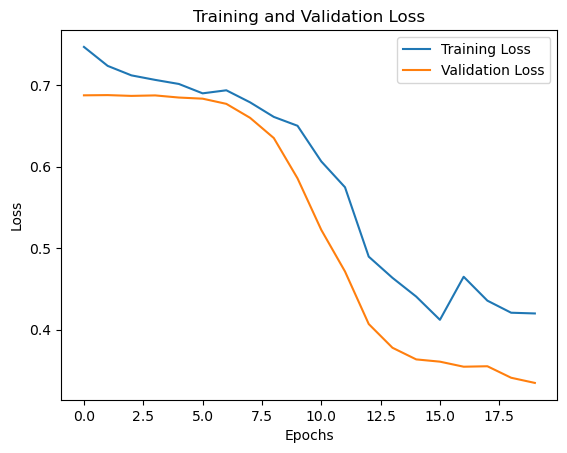

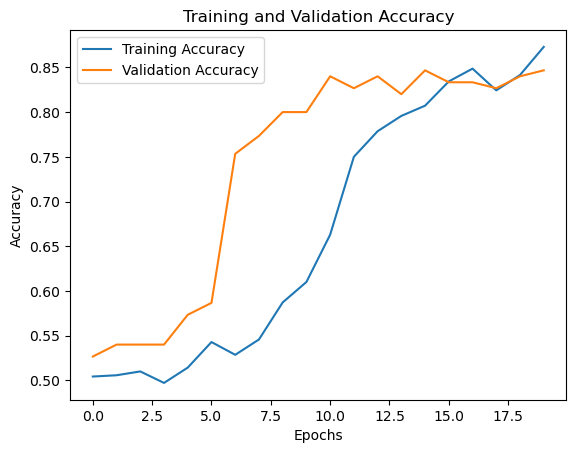

In [2]:
# Tạo mô hình 7_layer bằng cách thêm 7 layer vào code, thêm 100 neuron và dropout và giải thích như Câu 1 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo dataset giả lập (phân loại nhị phân)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Chia tập dữ liệu thành train (70%), validation (15%) và test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Xây dựng mô hình MLP với 7 lớp, thêm 100 neuron và dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # Lớp đầu vào
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Lớp đầu ra cho phân loại nhị phân

# 4. Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history = model.fit(
    X_train, y_train,
    epochs=20, # Số lượng epoch
    batch_size=32, # Kích thước batch
    validation_data=(X_val, y_val), # Sử dụng tập validation
    verbose=1 # Hiển thị chi tiết quá trình huấn luyện
)

# 6. Đánh giá mô hình trên tập validation sau huấn luyện
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 7. Dự đoán trên tập test
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Làm tròn các giá trị dự đoán thành 0 hoặc 1

# 8. Tính các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Vẽ đồ thị Loss giữa train và validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị Accuracy giữa train và validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
